In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import albumentations as A

from sklearn.metrics import f1_score, classification_report
import pickle
from sklearn.model_selection import StratifiedKFold
from numpy import array
from random import shuffle, seed


In [25]:
!pip install albumentations

In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571e5a5f4de9c3445dae08a530498e5c53b0e74410eeeb0991c79047/gast-0.5.4-py3-none-any.whl.metadata
  Obtaining dependency information for google-pasta>=0.1.1 from https://files.pythonhosted.org/packages/a3/de/

In [8]:
!python -m pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/2.1 MB 1.8 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.1 MB 2.5 MB/s eta 0:00:01
   -------- ------------------------------- 0.5/2.1 MB 2.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.1 MB 3.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.1 MB 3.3 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 3.3 MB/s eta 0:00:01
   ---------------------- ----------------- 1.2/2.1 MB 3.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.1 MB 3.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.5/2.1 MB 3.

In [2]:
list_paths = []
for subdir, dirs, files in os.walk(r"C:\Users\Administrator\Desktop\mp-SCI"):
    for file in files:
        filepath = subdir + os.sep + file
        list_paths.append(filepath)
        
list_train = [filepath for filepath in list_paths if r"\Desktop\mp-SCI\train" in filepath]
seed(420)
shuffle(list_train)
list_test = [filepath for filepath in list_paths if r"\Desktop\mp-SCI\test" in filepath]

In [3]:
list_train[:5]

['C:\\Users\\Administrator\\Desktop\\mp-SCI\\train\\train\\Sony-NEX-7\\(Nex7)30.JPG',
 'C:\\Users\\Administrator\\Desktop\\mp-SCI\\train\\train\\Samsung-Galaxy-S4\\(GalaxyS4)8.jpg',
 'C:\\Users\\Administrator\\Desktop\\mp-SCI\\train\\train\\iPhone-6\\(iP6)89.jpg',
 'C:\\Users\\Administrator\\Desktop\\mp-SCI\\train\\train\\iPhone-4s\\(iP4s)108.jpg',
 'C:\\Users\\Administrator\\Desktop\\mp-SCI\\train\\train\\Motorola-Droid-Maxx\\(MotoMax)127.jpg']

In [4]:
def get_class_from_path(filepath):
    return os.path.dirname(filepath).split(os.sep)[-1]

In [5]:
labels = [get_class_from_path(filepath) for filepath in list_train]

In [6]:
labels[:5]

['Sony-NEX-7',
 'Samsung-Galaxy-S4',
 'iPhone-6',
 'iPhone-4s',
 'Motorola-Droid-Maxx']

In [7]:
train_data = pd.DataFrame(labels, columns=['class'])
train_data['path'] = list_train
train_data.head()

,class,path
0,Sony-NEX-7,C:\Users\Administrator\Desktop\mp-SCI\train\tr...
1,Samsung-Galaxy-S4,C:\Users\Administrator\Desktop\mp-SCI\train\tr...
2,iPhone-6,C:\Users\Administrator\Desktop\mp-SCI\train\tr...
3,iPhone-4s,C:\Users\Administrator\Desktop\mp-SCI\train\tr...
4,Motorola-Droid-Maxx,C:\Users\Administrator\Desktop\mp-SCI\train\tr...


<Axes: xlabel='class'>

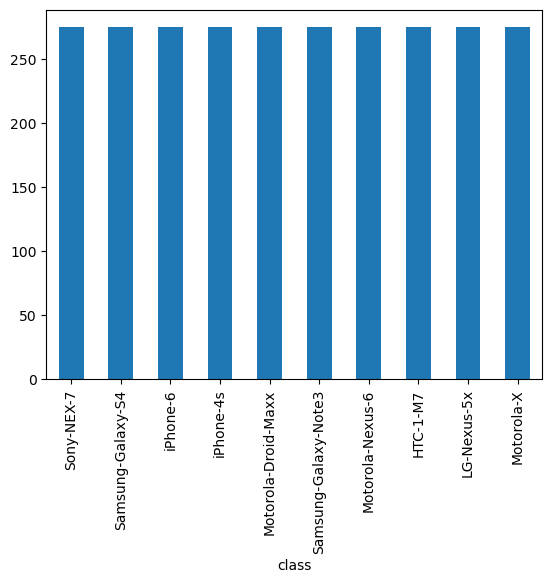

In [8]:
train_data['class'].value_counts().sort_values().plot(kind='bar')

In [9]:
X = train_data['path']
y = train_data['class']

In [10]:
splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
splits = list(splitter.split(X=X, y=y))

In [11]:
y.shape

(2750,)

In [12]:
y = pd.get_dummies(y)
y.head()

,HTC-1-M7,LG-Nexus-5x,Motorola-Droid-Maxx,Motorola-Nexus-6,Motorola-X,Samsung-Galaxy-Note3,Samsung-Galaxy-S4,Sony-NEX-7,iPhone-4s,iPhone-6
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False,False


In [13]:
dict_map = {"0": "HTC-1-M7", 
            "1": "LG-Nexus-5x", 
            "2": "Motorola-Droid-Maxx", 
            "3": "Motorola-Nexus-6", 
            "4": "Motorola-X", 
            "5": "Samsung-Galaxy-Note3",
            "6": "Samsung-Galaxy-S4",
            "7": "Sony-NEX-7",
            "8": "iPhone-4s",
            "9": "iPhone-6"}

In [14]:
def open_image(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [18]:
SHAPE = 512

train_augmentations = A.Compose([A.RandomCrop(height=SHAPE,width=SHAPE),
                                 A.RandomGamma(gamma_limit=(80, 120), p=0.8),
                                 A.ImageCompression(quality_lower=70, quality_upper=90, p=0.9),
                                 A.GridDistortion(interpolation=cv2.INTER_CUBIC, p=0.9)
                                 ])

teste_augmentations = A.Compose([A.CenterCrop(height=SHAPE,width=SHAPE)                              
                                 ])

In [19]:
class CameraDataset(tf.keras.utils.Sequence):
    def __init__(self, X_set, y_set, batch_size, augmenter=None, test=False, *args, **kwargs):
        
        self.batch_size = batch_size
        self.x_set = X_set
        self.y_set = y_set
        self.test = test
        self.augmenter = augmenter
        
    def __len__(self):
        return int(len(self.x_set) / self.batch_size)
    
    
    def __getitem__(self, index):
        X = self.x_set[index * self.batch_size : (index + 1) * self.batch_size]        
        y = self.y_set[index * self.batch_size : (index + 1) * self.batch_size]
        
        X = [(self.augmenter(image=open_image(x))['image']) for x in X]
        
        if self.test:
            return np.array(X)
        
        return np.array(X), y.values

In [20]:
train_dataset = CameraDataset(X, y, batch_size=8, augmenter=train_augmentations)

In [21]:
x_set, y_set = train_dataset.__getitem__(50)

In [22]:
x_set[0].shape

(512, 512, 3)

In [23]:
y_set[0]

array([False, False,  True, False, False, False, False, False, False,
       False])

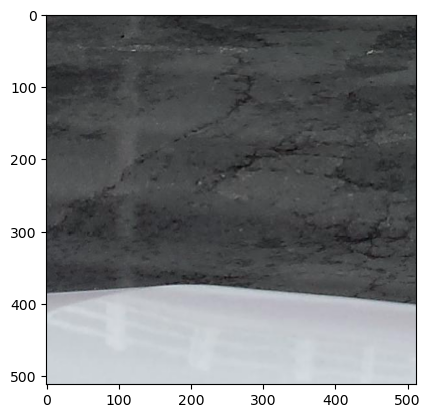

In [24]:
plt.imshow(x_set[3])

In [29]:
from tensorflow.keras.optimizers import Adam

In [33]:
def build_model():
    base_model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=[SHAPE, SHAPE, 3])
    base_model.trainable = True
    inputs =tf.keras.layers.Input(shape=(SHAPE,SHAPE,3))
    x = tf.keras.applications.densenet.preprocess_input(inputs)
    x = base_model(x, training=True)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

    model =tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary() 
    return model

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

train_dataset = CameraDataset(X_train, y_train, batch_size=10,augmenter=train_augmentations)
val_dataset = CameraDataset(X_test, y_test, batch_size=10,augmenter=teste_augmentations)

In [35]:
model = build_model()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_4 (TrueDivide)           │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ add_2 (Add)                          │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_5 (TrueDivide)           │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet201 (Functional)             │ (None, 16, 16, 1920)        │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1920)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         122,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,447,338 (70.37 MB)

 Trainable params: 18,218,282 (69.50 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [38]:
file_path = "weights.best.keras"

checkpoint = tf.keras.callbacks.ModelCheckpoint(file_path, monitor="val_accuracy", save_best_only=True, mode='max')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.9, patience=2, min_lr=1e-6, mode="max", verbose=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, mode="max", verbose=True)

callbacks_list = [checkpoint, reduce_lr, early_stopping]

history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, batch_size=10, callbacks=callbacks_list)

Epoch 1/100


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


220/220 ━━━━━━━━━━━━━━━━━━━━ 1267s 6s/step - accuracy: 0.1033 - loss: 2.5124 - val_accuracy: 0.0909 - val_loss: 2.3868 - learning_rate: 1.0000e-06
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1219s 6s/step - accuracy: 0.1178 - loss: 2.4884 - val_accuracy: 0.1255 - val_loss: 2.3409 - learning_rate: 1.0000e-06
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1216s 5s/step - accuracy: 0.1136 - loss: 2.4386 - val_accuracy: 0.1345 - val_loss: 2.3014 - learning_rate: 1.0000e-06
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1214s 5s/step - accuracy: 0.1224 - loss: 2.3502 - val_accuracy: 0.1582 - val_loss: 2.2666 - learning_rate: 1.0000e-06
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1214s 5s/step - accuracy: 0.1221 - loss: 2.3210 - val_accuracy: 0.1873 - val_loss: 2.2420 - learning_rate: 1.0000e-06
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1212s 5s/step - accuracy: 0.1325 - loss: 2.2972 - val_accuracy: 0.2182 - val_loss: 2.2176 - learning_rate: 1.0000e-06
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1210s 5s/step - a

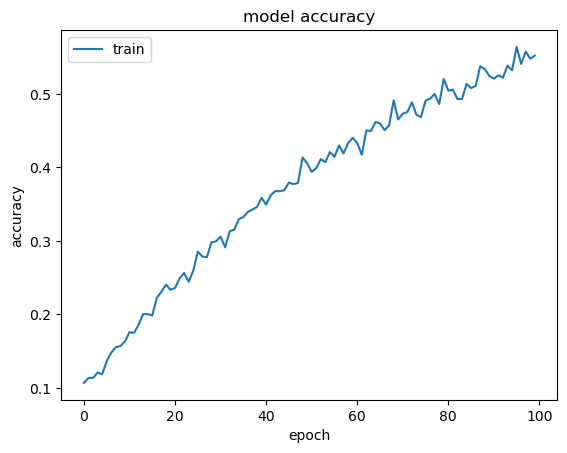

In [39]:
history.history.keys()
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

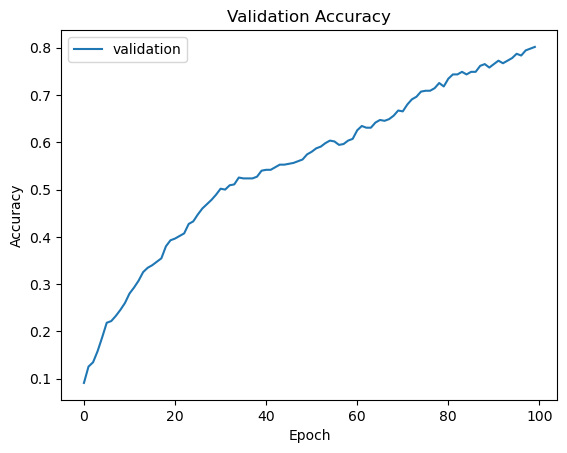

In [40]:
plt.plot(history.history['val_accuracy'])  # Use 'val_accuracy' instead of 'accuracy'
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['validation'], loc='upper left')
plt.show()

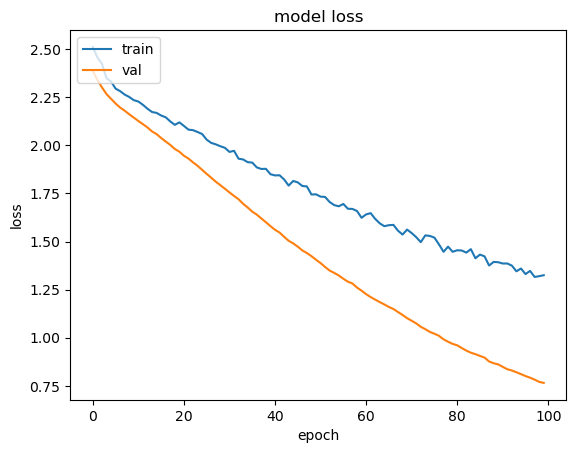

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()